In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
np.set_printoptions(suppress=True, linewidth=100, precision = 2)


In [8]:
raw_data = pd.read_csv('AB_NYC_2019.csv')
raw_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
raw_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data_to_clean = raw_data.copy()

In [12]:
data_to_clean = data_to_clean.drop(['host_name'], axis = 1)
data_to_clean.head(3)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [13]:
data_to_clean['reviews_per_month'].isnull().sum()

10052

In [14]:
data_to_clean['reviews_per_month'] = data_to_clean['reviews_per_month'].fillna(0)
data_to_clean['reviews_per_month']

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [15]:
data_cleaned = data_to_clean.copy()

To Examine Data

In [16]:
data_cleaned.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [17]:
data_cleaned['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], dtype=object)

In [18]:
data_cleaned['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
data_cleaned['price'].min(), data_cleaned['price'].max()

(0, 10000)

In [20]:
top_host = data_cleaned['host_id'].value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [23]:
top_host_df=pd.DataFrame(top_host)
top_host_df

,count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


In [24]:
top_host_df.reset_index(inplace=True)
#top_host_df.rename(columns = {'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [25]:
top_host_df['host_id'] = top_host_df['host_id'].astype('str')

In [111]:
top_host_df['count']

0    327
1    232
2    121
3    103
4     96
5     96
6     91
7     87
8     65
9     52
Name: count, dtype: int64

Data Viz

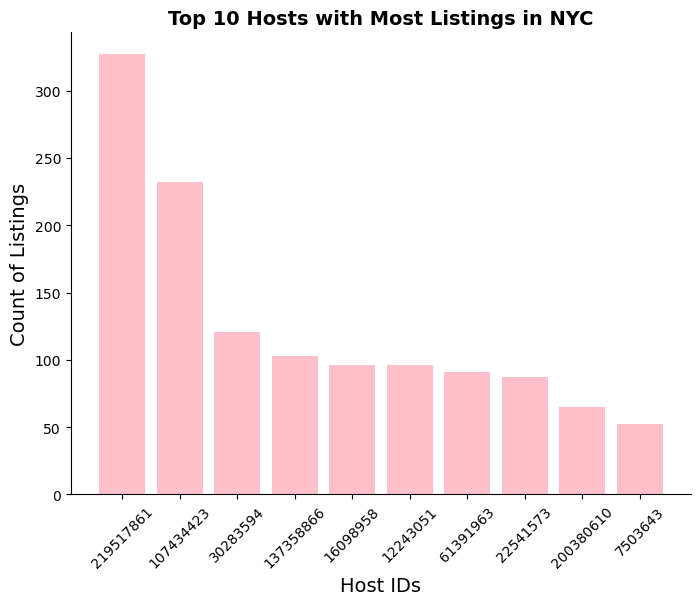

In [131]:
plt.figure(figsize = (8,6))
plt.bar(top_host_df['host_id'], top_host_df['count'], color = 'pink')
plt.xticks(top_host_df['host_id'], rotation = 45)
plt.xlabel('Host IDs', fontsize = 14)
plt.ylabel('Count of Listings', fontsize = 14)
plt.title('Top 10 Hosts with Most Listings in NYC', fontsize = 14, weight = 'bold')
sns.despine()
plt.savefig('Top 10 Hosts with Most Listings in NYC.jpg')
plt.show()

In [141]:
data_cleaned

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [26]:
#most common words
data_cleaned['name'][1].split()

['Skylit', 'Midtown', 'Castle']

In [27]:
total_words = []
for i in range(data_cleaned['name'].shape[0]):
    words = str(data_cleaned['name'][i]).split()
    for w in words:
        total_words.append(w.lower())

In [28]:
total_words

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 'skylit',
 'midtown',
 'castle',
 'the',
 'village',
 'of',
 'harlem....new',
 'york',
 '!',
 'cozy',
 'entire',
 'floor',
 'of',
 'brownstone',
 'entire',
 'apt:',
 'spacious',
 'studio/loft',
 'by',
 'central',
 'park',
 'large',
 'cozy',
 '1',
 'br',
 'apartment',
 'in',
 'midtown',
 'east',
 'blissartsspace!',
 'large',
 'furnished',
 'room',
 'near',
 "b'way",
 'cozy',
 'clean',
 'guest',
 'room',
 '-',
 'family',
 'apt',
 'cute',
 '&',
 'cozy',
 'lower',
 'east',
 'side',
 '1',
 'bdrm',
 'beautiful',
 '1br',
 'on',
 'upper',
 'west',
 'side',
 'central',
 'manhattan/near',
 'broadway',
 'lovely',
 'room',
 '1,',
 'garden,',
 'best',
 'area,',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'in',
 'manhattan',
 'for',
 'singles',
 'west',
 'village',
 'nest',
 '-',
 'superhost',
 'only',
 '2',
 'stops',
 'to',
 'manhattan',
 'studio',
 'perfect',
 'for',
 'your',
 'parents',
 '+',
 'garden',
 'chelsea',


In [29]:
word_count = {}
for i in total_words:
    word_count[i] = word_count.get(i, 0) +1

In [30]:
word_count

{'clean': 839,
 '&': 2820,
 'quiet': 1015,
 'apt': 3571,
 'home': 1619,
 'by': 929,
 'the': 3869,
 'park': 2632,
 'skylit': 7,
 'midtown': 1149,
 'castle': 14,
 'village': 2055,
 'of': 2993,
 'harlem....new': 1,
 'york': 558,
 '!': 140,
 'cozy': 4634,
 'entire': 569,
 'floor': 485,
 'brownstone': 1107,
 'apt:': 21,
 'spacious': 3387,
 'studio/loft': 2,
 'central': 1714,
 'large': 1882,
 '1': 3357,
 'br': 1060,
 'apartment': 6113,
 'in': 16733,
 'east': 2967,
 'blissartsspace!': 1,
 'furnished': 381,
 'room': 9389,
 'near': 2295,
 "b'way": 2,
 'guest': 245,
 '-': 2272,
 'family': 271,
 'cute': 391,
 'lower': 404,
 'side': 1261,
 'bdrm': 334,
 'beautiful': 2320,
 '1br': 1446,
 'on': 1071,
 'upper': 1318,
 'west': 1522,
 'manhattan/near': 1,
 'broadway': 72,
 'lovely': 652,
 '1,': 5,
 'garden,': 19,
 'best': 575,
 'area,': 16,
 'legal': 15,
 'rental': 89,
 'wonderful': 73,
 'bedroom': 7231,
 'manhattan': 2855,
 'for': 1308,
 'singles': 6,
 'nest': 55,
 'superhost': 15,
 'only': 195,
 '2':

In [31]:
word_count_df = pd.DataFrame.from_dict(word_count, orient='index')
word_count_df

,0
clean,839
&,2820
quiet,1015
apt,3571
home,1619
...,...
yard-,1
raccoon,1
_,1
quit,1


In [32]:
word_count_df.reset_index(inplace=True)

In [33]:
word_count_df.rename(columns = {'index': 'word', 0:'count'})

,word,count
0,clean,839
1,&,2820
2,quiet,1015
3,apt,3571
4,home,1619
...,...,...
17333,yard-,1
17334,raccoon,1
17335,_,1
17336,quit,1


In [34]:
word_count_df = word_count_df.rename(columns = {'index': 'word', 0:'count'})

In [35]:
word_count_df.nlargest(10, ['count'])

,word,count
28,in,16733
32,room,9389
57,bedroom,7231
140,private,6985
27,apartment,6113
16,cozy,4634
6,the,3869
66,to,3827
67,studio,3772
82,brooklyn,3629


In [212]:
word_count_df = word_count_df.sort_values(by = ['count'], ascending=False)
word_count_df

,word,count
28,in,16733
32,room,9389
57,bedroom,7231
140,private,6985
27,apartment,6113
...,...,...
16676,"clean,central",1
16677,mansion),1
16678,rise-corner,1
16679,view-walk,1


In [214]:
top_20_words = word_count_df.head(20)
top_20_words

,word,count
28,in,16733
32,room,9389
57,bedroom,7231
140,private,6985
27,apartment,6113
16,cozy,4634
6,the,3869
66,to,3827
67,studio,3772
82,brooklyn,3629


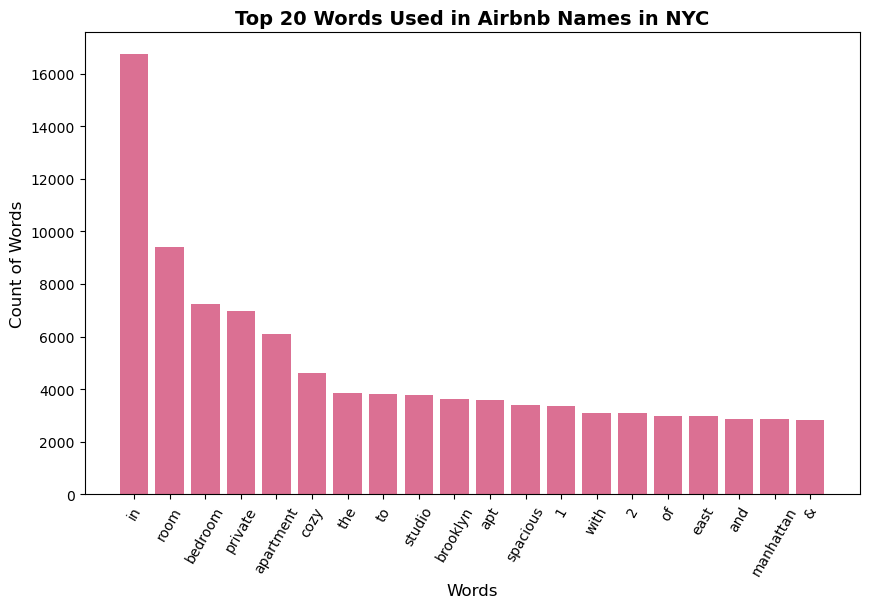

In [229]:
plt.figure(figsize = (10,6))
plt.bar(top_20_words['word'], top_20_words['count'], color = 'palevioletred')
plt.xticks(rotation = 60)
plt.xlabel('Words', fontsize = 12)
plt.ylabel('Count of Words', fontsize = 12)
plt.title('Top 20 Words Used in Airbnb Names in NYC', fontsize = 14, weight = 'bold')
plt.savefig('Top 20 Words Used in Airbnb Names in NYC.jpg')
plt.show()

In [230]:
#room types

In [249]:
room_count = data_cleaned['room_type'].value_counts()
room_count.index

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [240]:
df_entire_room = data_cleaned.loc[data_cleaned['room_type'] == 'Entire home/apt']
entire_price_avg = df_entire_room['price'].mean().round(2)
entire_price_avg

211.79

In [241]:
df_private_room = data_cleaned.loc[data_cleaned['room_type'] == 'Private room']
private_price_avg = df_private_room['price'].mean().round(2)
df_shared_room = data_cleaned.loc[data_cleaned['room_type'] == 'Shared room']
share_price_avg = df_shared_room['price'].mean().round(2)

In [250]:
room_type_avg = pd.DataFrame({'Room Type': ('Entire home/apt', 'Private room', 'Shared room'), 
                              'Avg price':(entire_price_avg, private_price_avg, share_price_avg),
                             'Room count': (room_count[i] for i in range(len(room_count)))})

In [256]:
room_type_avg

,Room Type,Avg price,Room count
0,Entire home/apt,211.79,25409
1,Private room,89.78,22326
2,Shared room,70.13,1160


In [257]:
data_cleaned.to_csv('airbnb_clean_data.csv')

In [2]:
airbnb = pd.read_csv('airbnb_clean_data.csv')
airbnb.head(10)

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


F:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

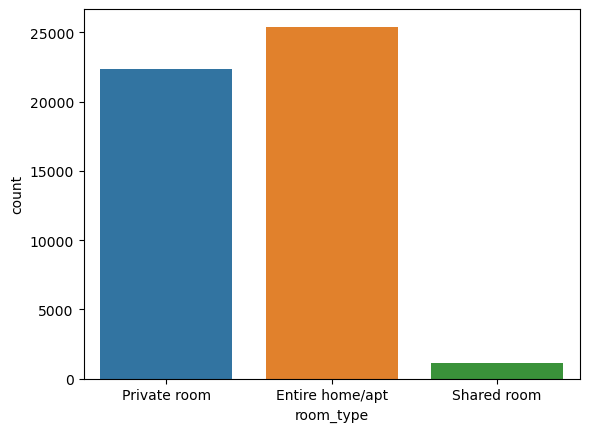

In [4]:
sns.countplot(airbnb['room_type'])